In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library (readr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
urlfile_1="https://raw.githubusercontent.com/cass12345/ddssccii/main/Seasons_Stats.csv"

season_data<-read_csv(url(urlfile_1))|>
select(Year,Player,Pos,BLK,AST,TRB,STL,MP,"3PA")#|>
#drop_na()
names(season_data)[names(season_data) == "Player"] <- "name"
season_data

New names:
• `` -> `...1`
Rows: 24691 Columns: 53
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Player, Pos, Tm
dbl (48): ...1, Year, Age, G, GS, MP, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%,...
lgl  (2): blanl, blank2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Year,name,Pos,BLK,AST,TRB,STL,MP,3PA
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1950,Curly Armstrong,G-F,NA,176,NA,NA,NA,NA
1950,Cliff Barker,SG,NA,109,NA,NA,NA,NA
1950,Leo Barnhorst,SF,NA,140,NA,NA,NA,NA
1950,Ed Bartels,F,NA,20,NA,NA,NA,NA
1950,Ed Bartels,F,NA,20,NA,NA,NA,NA
1950,Ed Bartels,F,NA,0,NA,NA,NA,NA
1950,Ralph Beard,G,NA,233,NA,NA,NA,NA
1950,Gene Berce,G-F,NA,2,NA,NA,NA,NA
1950,Charlie Black,F-C,NA,163,NA,NA,NA,NA


In [3]:
urlfile_2="https://raw.githubusercontent.com/cass12345/ddssccii/main/player_data.csv"

player_data<-read_csv(url(urlfile_2))|>
select(name,height,weight)|>
separate(col=height,
        into=c("feet","inches"),
        sep="-",
        convert=TRUE)|>
mutate(height=feet*12+inches)|>
select(name,weight,height)

player_data

Rows: 4550 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): name, position, height, birth_date, college
dbl (3): year_start, year_end, weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,weight,height
<chr>,<dbl>,<dbl>
Alaa Abdelnaby,240,82
Zaid Abdul-Aziz,235,81
Kareem Abdul-Jabbar,225,86
Mahmoud Abdul-Rauf,162,73
Tariq Abdul-Wahad,223,78
Shareef Abdur-Rahim,225,81
Tom Abernethy,220,79
Forest Able,180,75
John Abramovic,195,75


In [4]:
combined_data<-merge(x = season_data, y = player_data, by.x = "name", by.y = "name")|>
rename(three_PA="3PA")|>
drop_na()|>
filter(MP!=0)
combined_data

name,Year,Pos,BLK,AST,TRB,STL,MP,three_PA,weight,height
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.C. Green,2000,PF,18,80,486,53,1929,4,220,81
A.C. Green,1987,PF,80,84,615,70,2240,5,220,81
A.C. Green,1994,PF,38,137,753,70,2825,35,220,81
A.C. Green,1995,SF,31,127,669,55,2687,127,220,81
A.C. Green,1991,PF,23,71,516,59,2164,55,220,81
A.C. Green,1997,PF,1,17,138,18,548,3,220,81
A.C. Green,1997,PF,15,52,518,52,1944,17,220,81
A.C. Green,1986,PF,49,54,381,49,1542,6,220,81
A.C. Green,1999,PF,8,25,228,28,924,8,220,81


In [5]:
new_data<-combined_data|>
filter(Year>=2000)|>
group_by(name,Pos,height,weight)|>
summarize(across(c(BLK,AST,TRB,STL,MP,three_PA),list(sum=sum))) |>
mutate(BLK_per_m=BLK_sum/MP_sum, AST_per_m=AST_sum/MP_sum, 
       TRB_per_m=TRB_sum/MP_sum, STL_per_m=STL_sum/MP_sum, three_PA_per_m=three_PA_sum/MP_sum) |>
select(Pos, height, weight, BLK_per_m, AST_per_m, TRB_per_m, STL_per_m, three_PA_per_m)|>
filter(Pos %in% c("PF","PG","SF","SG","C"))

new_data

`summarise()` has grouped output by 'name', 'Pos', 'height'. You can override
using the `.groups` argument.
Adding missing grouping variables: `name`


name,Pos,height,weight,BLK_per_m,AST_per_m,TRB_per_m,STL_per_m,three_PA_per_m
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.C. Green,PF,81,220,0.007784431,0.03562874,0.23922156,0.024850299,2.994012e-03
A.J. Bramlett,C,82,227,0.000000000,0.00000000,0.36065574,0.016393443,0.000000e+00
A.J. Guyton,PG,73,180,0.009630819,0.11797753,0.06420546,0.016051364,1.548957e-01
A.J. Hammons,C,84,260,0.079754601,0.02453988,0.22085890,0.006134969,6.134969e-02
A.J. Price,PG,74,181,0.002166586,0.14443909,0.09605200,0.031535869,1.745306e-01
A.J. Price,SG,74,181,0.000000000,0.13131313,0.10101010,0.010101010,2.222222e-01
Aaron Brooks,PG,72,161,0.006612828,0.14542369,0.07958801,0.027446161,1.641503e-01
Aaron Gordon,PF,81,220,0.028947368,0.06052632,0.25413534,0.030075188,7.142857e-02
Aaron Gordon,SF,81,220,0.017406440,0.06527415,0.17624021,0.027850305,1.161880e-01


In [6]:
# get the training data
data_split <- initial_split(new_data, prop = 0.75, strata = Pos)
player_train <- training(data_split)
player_test <- testing(data_split)
player_train


name,Pos,height,weight,BLK_per_m,AST_per_m,TRB_per_m,STL_per_m,three_PA_per_m
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.J. Bramlett,C,82,227,0.000000000,0.00000000,0.36065574,0.01639344,0.000000e+00
Aaron Gray,C,84,270,0.023466903,0.05556785,0.31148993,0.02501660,8.855435e-04
Adam Keefe,C,81,230,0.021523179,0.05629139,0.22516556,0.02814570,1.655629e-03
Adonal Foyle,C,82,250,0.093317584,0.02640904,0.26231860,0.01991225,8.437395e-05
Al Harrington,C,81,230,0.007362495,0.06149848,0.20181897,0.03378086,1.896925e-01
Al Horford,C,82,245,0.036405851,0.08943580,0.26041328,0.02479684,2.614349e-02
Aleksandar Radojevic,C,87,250,0.019736842,0.04605263,0.23684211,0.01315789,0.000000e+00
Alex Kirk,C,84,245,0.000000000,0.07142857,0.07142857,0.00000000,0.000000e+00
Alexis Ajinca,C,86,248,0.047747969,0.03691853,0.29485602,0.02608910,1.821314e-02


In [7]:
# summarize player_train dataset
summary(player_train)

     name               Pos                height          weight     
 Length:1741        Length:1741        Min.   :63.00   Min.   :135.0  
 Class :character   Class :character   1st Qu.:77.00   1st Qu.:200.0  
 Mode  :character   Mode  :character   Median :79.00   Median :220.0  
                                       Mean   :79.05   Mean   :219.3  
                                       3rd Qu.:82.00   3rd Qu.:238.0  
                                       Max.   :91.00   Max.   :360.0  
   BLK_per_m          AST_per_m         TRB_per_m        STL_per_m      
 Min.   :0.000000   Min.   :0.00000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.005882   1st Qu.:0.03857   1st Qu.:0.1107   1st Qu.:0.02144  
 Median :0.013215   Median :0.05899   Median :0.1579   Median :0.02878  
 Mean   :0.020262   Mean   :0.07370   Mean   :0.1722   Mean   :0.03039  
 3rd Qu.:0.027562   3rd Qu.:0.09639   3rd Qu.:0.2273   3rd Qu.:0.03767  
 Max.   :0.500000   Max.   :0.36842   Max.   :1.0000   Max.   :0.

In [8]:
# display rows and columns
dim(player_train)

[1] 1741    9

In [9]:
#count total missing values in each column
sapply(player_train, function(x) sum(is.na(x)))

name            Pos         height         weight      BLK_per_m 
             0              0              0              0              0 
     AST_per_m      TRB_per_m      STL_per_m three_PA_per_m 
             0              0              0              0

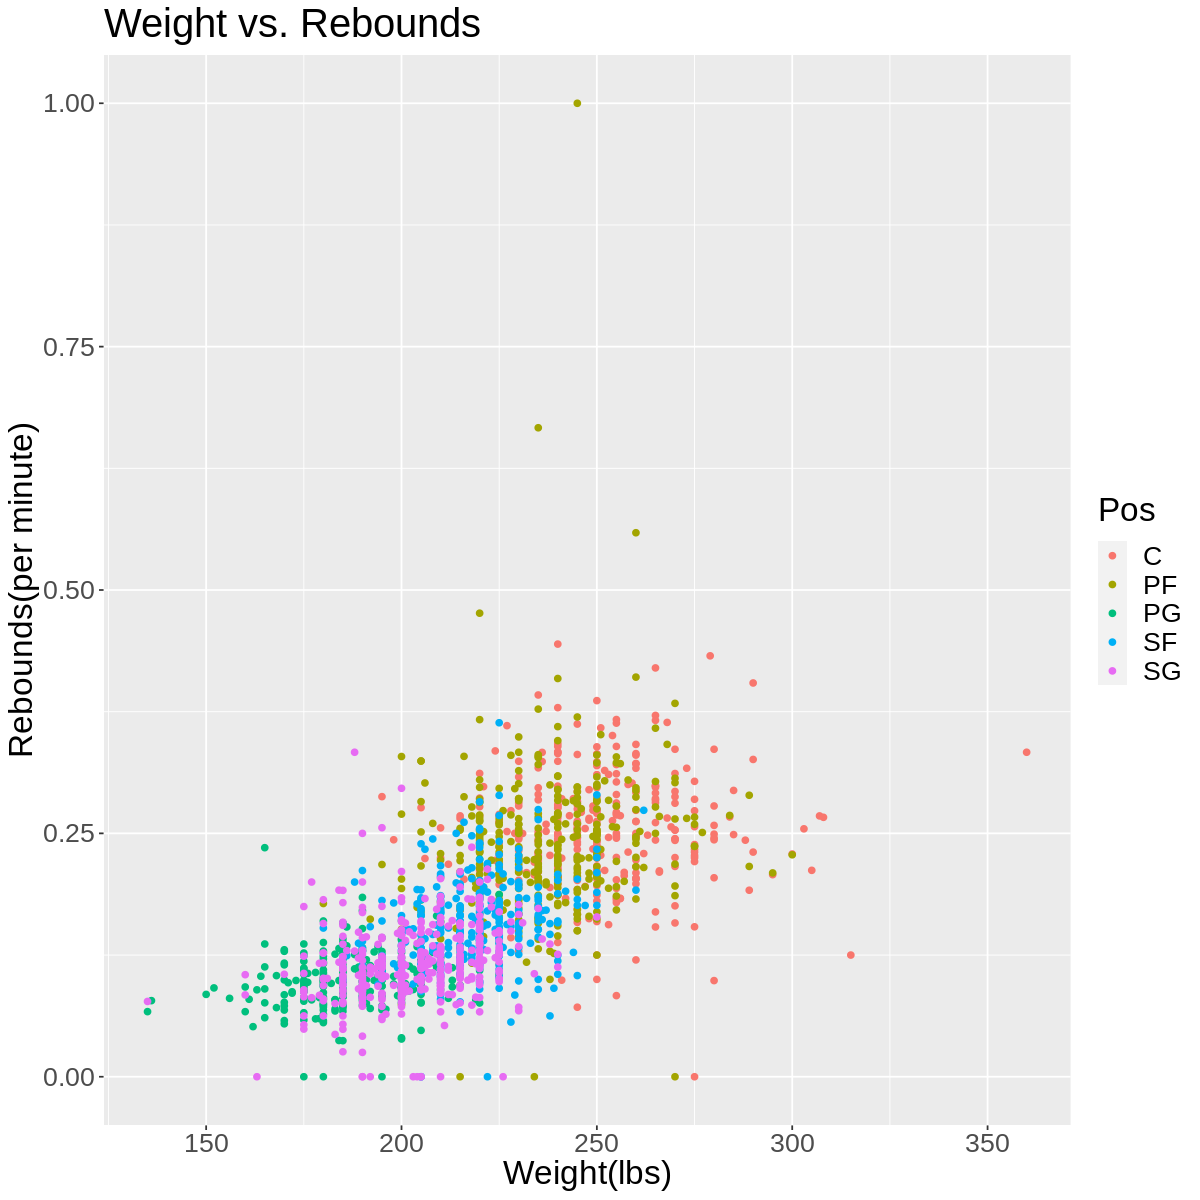

In [17]:

options(repr.plot.width = 10, repr.plot.height = 10)

player_train_plot1<-player_train  |>  
    ggplot(aes(x= weight, 
               y= TRB_per_m, 
               color=Pos
               )) +
    geom_point() +
            xlab("Weight(lbs)")+
            ylab("Rebounds(per minute)")+
            labs(title="Weight vs. Rebounds")+
    theme(text=element_text(size=20))
        
player_train_plot1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



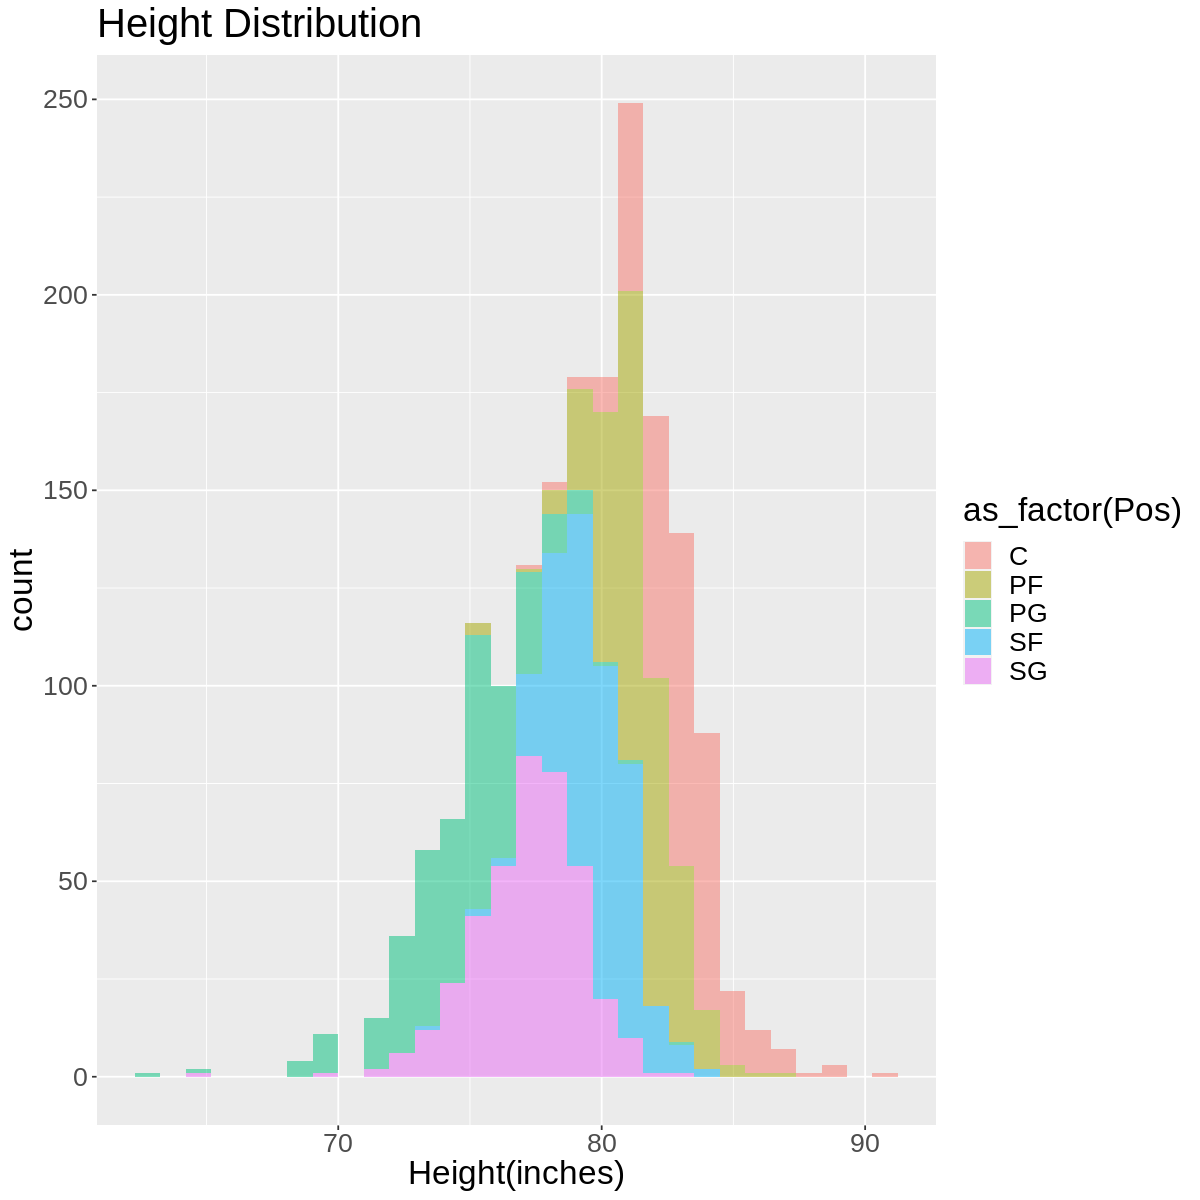

In [20]:
player_train_plot2<- ggplot(player_train, aes(x = height, fill = as_factor(Pos))) +
  geom_histogram(alpha = 0.5)+
            xlab("Height(inches)")+
            labs(title="Height Distribution")+
    theme(text=element_text(size=20))
player_train_plot2